In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
df=pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400
2,17200,45900,69300,9300
3,151500,41300,58500,18500
4,180800,10800,58400,12900


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   TV         200 non-null    int64
 1   radio      200 non-null    int64
 2   newspaper  200 non-null    int64
 3   sales      200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [4]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [5]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147042.500000,23264.000000,30554.000000,14022.500000
std,85854.236315,14846.809176,21778.620839,5217.456566
min,700.000000,0.000000,300.000000,1600.000000
25%,74375.000000,9975.000000,12750.000000,10375.000000
50%,149750.000000,22900.000000,25750.000000,12900.000000
75%,218825.000000,36525.000000,45100.000000,17400.000000
max,296400.000000,49600.000000,114000.000000,27000.000000


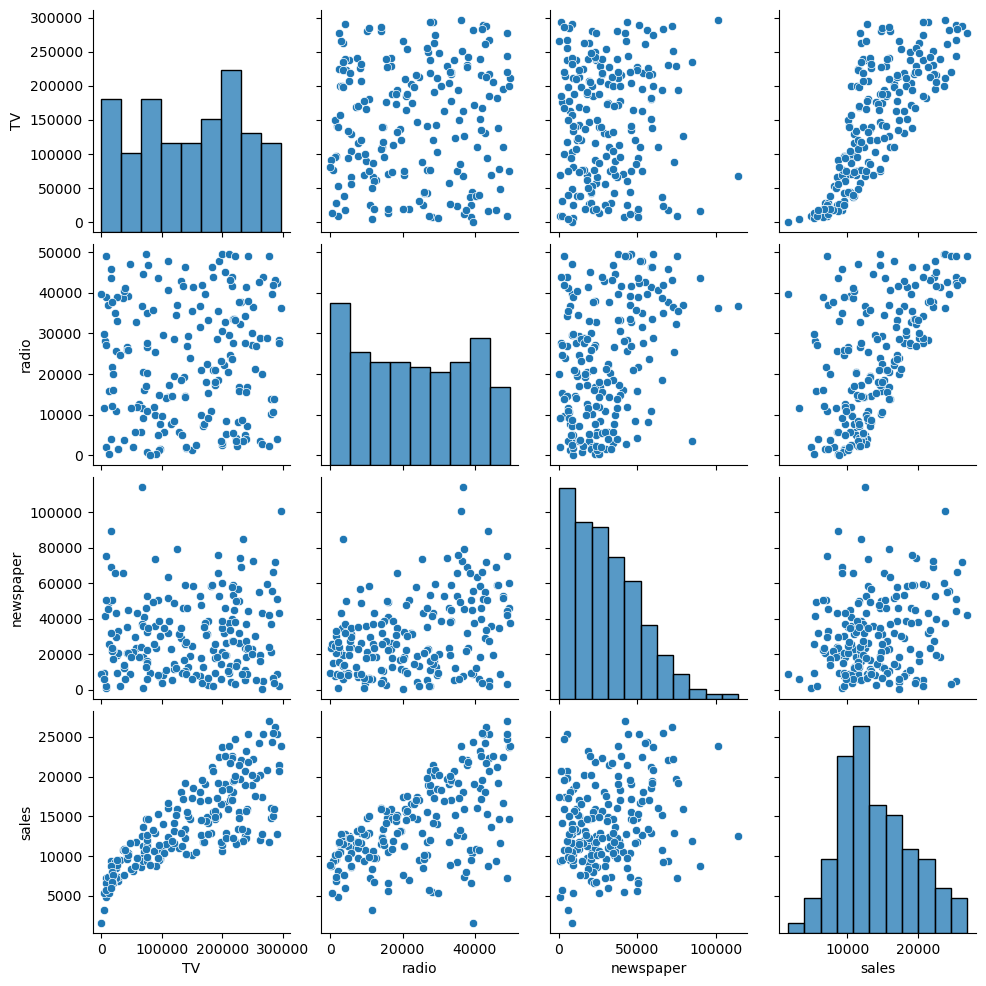

In [6]:
sns.pairplot(df)
plt.show()

In [7]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [8]:
x=df.drop(columns='sales')
y=df['sales']

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
model=LinearRegression()

In [12]:
model.fit(x_train,y_train)

LinearRegression()

In [13]:
model.intercept_

2708.949092515908

In [14]:
model.coef_

array([0.04405928, 0.1992875 , 0.00688245])

In [15]:
train_predictions=model.predict(x_train)

In [16]:
test_predictions=model.predict(x_test)

In [17]:
from sklearn.metrics import mean_squared_error
print('RMSE for test data: ',np.sqrt(mean_squared_error(y_test,test_predictions)))
print('RMSE for train data: ',np.sqrt(mean_squared_error(y_train,train_predictions)))


RMSE for test data:  1948.537204344638
RMSE for train data:  1574.5968305905444


In [18]:
model.score(x_train,y_train)

0.9055159502227753

In [19]:
model.score(x_test,y_test)

0.8609466508230369

In [20]:
test_res=y_test-test_predictions

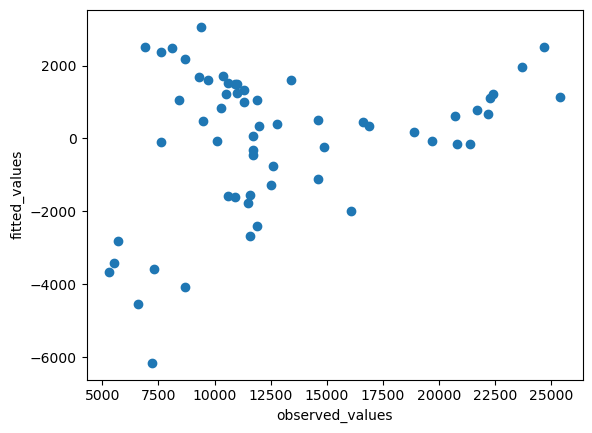

In [21]:
plt.scatter(y_test,test_res)
plt.xlabel('observed_values')
plt.ylabel('fitted_values')
plt.show()

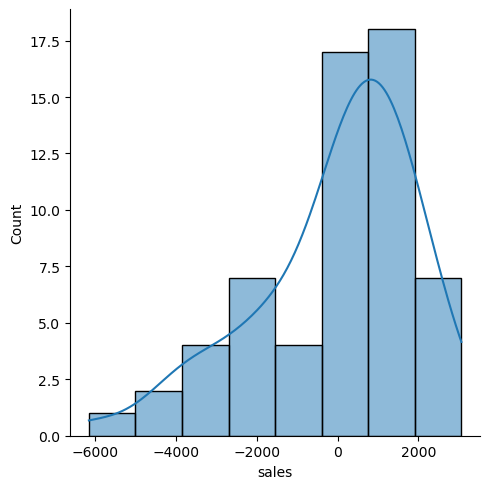

In [22]:
sns.displot(test_res,kde=True)
plt.show()

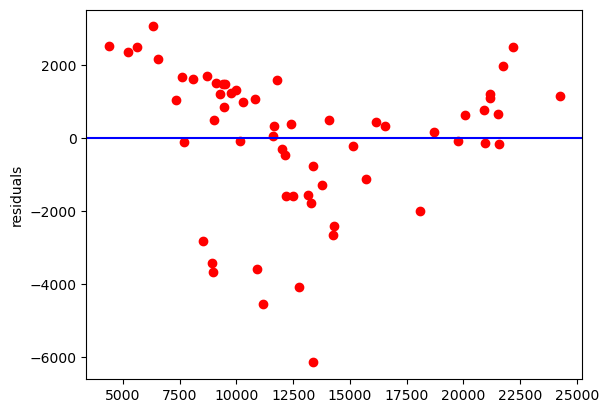

In [23]:
plt.scatter(test_predictions,test_res,c='r')
plt.axhline(y=0,color='blue')
plt.xlabel=('fitted_values')
plt.ylabel('residuals')
plt.show()

In [24]:
import statsmodels.formula.api as smf
model1=smf.ols('y~x',data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 02 Feb 2023   Prob (F-statistic):           1.58e-96
Time:                        21:33:39   Log-Likelihood:                -1767.7
No. Observations:                 200   AIC:                             3543.
Df Residuals:                     196   BIC:                             3557.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2938.8894    311.908      9.422      0.000    2323.762    3554.016
x[0]           0.0458      0.001     32.809      0.000       0.043       0.049
x[1]           0.1885      0.009     21.893      0.000       0.172       0.206
x[2]          -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                     4.54e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

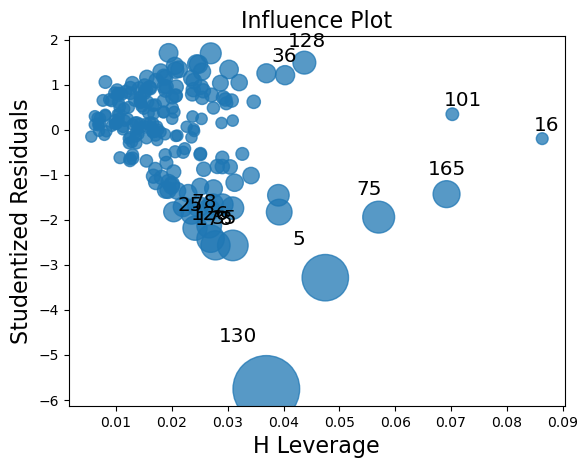

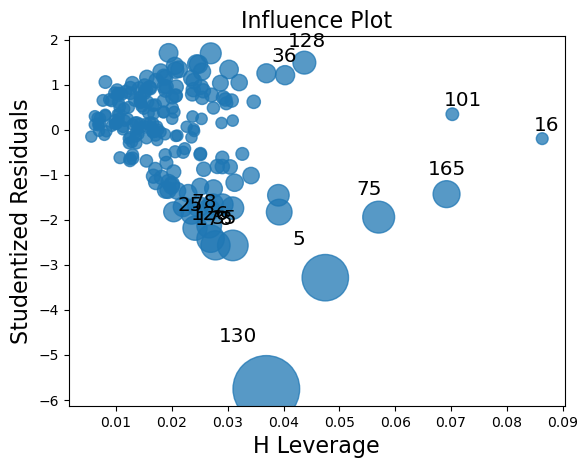

In [25]:
import statsmodels.api as sm
sm.graphics.influence_plot(model1)

In [26]:
df.iloc[130]

TV             700
radio        39600
newspaper     8700
sales         1600
Name: 130, dtype: int64

In [30]:
df_new=df.drop(df.index[[130]],axis=0)
df_new

,TV,radio,newspaper,sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400
2,17200,45900,69300,9300
3,151500,41300,58500,18500
4,180800,10800,58400,12900
...,...,...,...,...
195,38200,3700,13800,7600
196,94200,4900,8100,9700
197,177000,9300,6400,12800
198,283600,42000,66200,25500


In [33]:
df

,TV,radio,newspaper,sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400
2,17200,45900,69300,9300
3,151500,41300,58500,18500
4,180800,10800,58400,12900
...,...,...,...,...
195,38200,3700,13800,7600
196,94200,4900,8100,9700
197,177000,9300,6400,12800
198,283600,42000,66200,25500


In [32]:
df_new

,TV,radio,newspaper,sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400
2,17200,45900,69300,9300
3,151500,41300,58500,18500
4,180800,10800,58400,12900
...,...,...,...,...
195,38200,3700,13800,7600
196,94200,4900,8100,9700
197,177000,9300,6400,12800
198,283600,42000,66200,25500


In [35]:
lm=smf.ols('sales~TV + radio + newspaper',data=df_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     653.7
Date:                Thu, 02 Feb 2023   Prob (F-statistic):          1.88e-101
Time:                        21:40:35   Log-Likelihood:                -1743.8
No. Observations:                 199   AIC:                             3496.
Df Residuals:                     195   BIC:                             3509.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3093.0655    290.332     10.654      0.000    2520.471    3665.660
TV             0.0448      0.001     34.425      0.000       0.042       0.047
radio          0.1939      0.008     24.130      0.000       0.178       0.210
newspaper     -0.0043      0.005     -0.777      0.438      -0.015       0.007
==============================================================================
Omnibus:                       21.217   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.630
Skew:                          -0.835   Prob(JB):                     4.48e-06
Kurtosis:                       3.423   Cond. No.                     4.56e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
rsq_TV=smf.ols('TV~radio+newspaper',data=df).fit().rsquared
vif_TV=1/(1-rsq_TV)

rsq_radio=smf.ols('radio~TV+newspaper',data=df).fit().rsquared
vif_radio=1/(1-rsq_radio)

rsq_newspaper=smf.ols('newspaper~radio+TV',data=df).fit().rsquared
vif_newspaper=1/(1-rsq_newspaper)


In [37]:
d1={'varaibles':['TV','radio','newspaper'],'VIF':[vif_TV,vif_radio,vif_newspaper]}
Vif_frame=pd.DataFrame(d1)
Vif_frame

,varaibles,VIF
0,TV,1.004611
1,radio,1.144952
2,newspaper,1.145187


eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


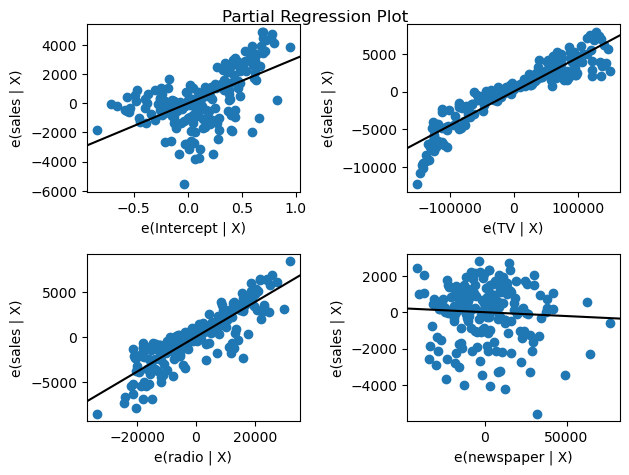

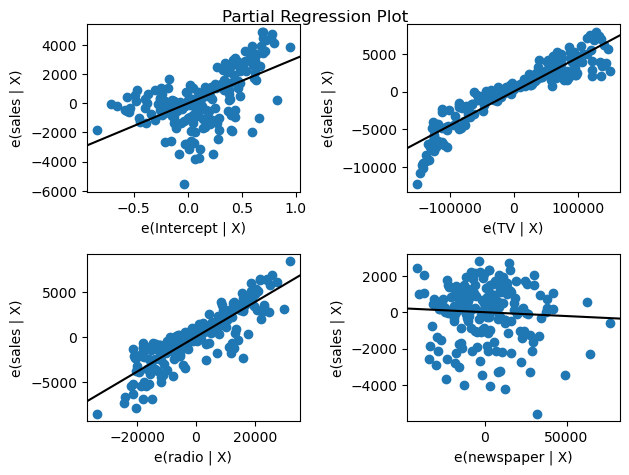

In [38]:
sm.graphics.plot_partregress_grid(lm)

In [39]:
final_model=smf.ols(formula='sales~TV+radio',data=df).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 02 Feb 2023   Prob (F-statistic):           4.83e-98
Time:                        22:02:02   Log-Likelihood:                -1767.7
No. Observations:                 200   AIC:                             3541.
Df Residuals:                     197   BIC:                             3551.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2921.0999    294.490      9.919      0.000    2340.343    3501.857
TV             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                     4.25e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""